In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
training_set=pd.read_csv("Google_Stock_Price_Train.csv")

In [6]:
training_set=training_set.iloc[:,1:2].values

In [7]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [16]:
#input and output
X_train=training_set_scaled[0:1257]
y_train=training_set_scaled[1:1258]

In [1]:
len(X_train)

NameError: name 'X_train' is not defined

In [12]:
y_train

array([[0.09701243],
       [0.09433366],
       [0.09156187],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [17]:
X_train=np.reshape(X_train,(1257,1,1))

In [18]:
X_train

array([[[0.08581368]],

       [[0.09701243]],

       [[0.09433366]],

       ...,

       [[0.95163331]],

       [[0.95725128]],

       [[0.93796041]]])

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [20]:
regressor=Sequential()

In [23]:
#adding input layer and lstm layer
regressor.add(LSTM(units=4, activation = "sigmoid" ,input_shape=(None , 1)))





In [24]:
regressor.add(Dense(units=1))

In [25]:
regressor.compile(optimizer ="adam",loss="mean_squared_error")

In [26]:
regressor.fit(X_train,y_train,batch_size=32,epochs = 200)

Epoch 1/200
1257/1257 [==============================] - 6s 5ms/step - loss: 0.6293
Epoch 2/200
1257/1257 [==============================] - 0s 176us/step - loss: 0.4849
Epoch 3/200
1257/1257 [==============================] - 0s 94us/step - loss: 0.3716
Epoch 4/200
1257/1257 [==============================] - 0s 85us/step - loss: 0.2845
Epoch 5/200
1257/1257 [==============================] - 0s 84us/step - loss: 0.2183
Epoch 6/200
1257/1257 [==============================] - 0s 80us/step - loss: 0.1688
Epoch 7/200
1257/1257 [==============================] - 0s 91us/step - loss: 0.1329
Epoch 8/200
1257/1257 [==============================] - 0s 82us/step - loss: 0.1076
Epoch 9/200
1257/1257 [==============================] - 0s 98us/step - loss: 0.0903
Epoch 10/200
1257/1257 [==============================] - 0s 72us/step - loss: 0.0788
Epoch 11/200
1257/1257 [==============================] - 0s 79us/step - loss: 0.0714
Epoch 12/200
1257/1257 [==============================] - 0s 83

Epoch 185/200
1257/1257 [==============================] - 0s 87us/step - loss: 2.4953e-04
Epoch 186/200
1257/1257 [==============================] - 0s 78us/step - loss: 2.5011e-04
Epoch 187/200
1257/1257 [==============================] - 0s 91us/step - loss: 2.4981e-04
Epoch 188/200
1257/1257 [==============================] - 0s 80us/step - loss: 2.4998e-04
Epoch 189/200
1257/1257 [==============================] - 0s 80us/step - loss: 2.5356e-04
Epoch 190/200
1257/1257 [==============================] - 0s 79us/step - loss: 2.5139e-04
Epoch 191/200
1257/1257 [==============================] - 0s 70us/step - loss: 2.4935e-04
Epoch 192/200
1257/1257 [==============================] - 0s 78us/step - loss: 2.5225e-04
Epoch 193/200
1257/1257 [==============================] - 0s 82us/step - loss: 2.5004e-04
Epoch 194/200
1257/1257 [==============================] - 0s 75us/step - loss: 2.5134e-04
Epoch 195/200
1257/1257 [==============================] - 0s 82us/step - loss: 2.5430e-04

In [27]:
test_set=pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price=test_set.iloc[:,1:2].values


In [28]:
inputs=real_stock_price

In [29]:
inputs = sc.transform(inputs)

In [31]:
inputs=np.reshape(inputs,(20,1,1))

In [32]:
inputs

array([[[0.92955205]],

       [[0.94731751]],

       [[0.94307612]],

       [[0.96015329]],

       [[0.98087655]],

       [[0.98359253]],

       [[0.97827219]],

       [[0.98225314]],

       [[0.98288563]],

       [[0.98214153]],

       [[0.979779  ]],

       [[0.97849542]],

       [[0.98182528]],

       [[0.98245777]],

       [[1.01045465]],

       [[1.02407173]],

       [[1.03930724]],

       [[1.03354044]],

       [[0.99624228]],

       [[0.9631297 ]]])

In [33]:
predicted_stock_price=regressor.predict(inputs)

In [34]:
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [35]:
predicted_stock_price

array([[778.7722 ],
       [787.50757],
       [785.42377],
       [793.8071 ],
       [803.9565 ],
       [805.2846 ],
       [802.68243],
       [804.62976],
       [804.93896],
       [804.57513],
       [803.4195 ],
       [802.79156],
       [804.4205 ],
       [804.72974],
       [818.3978 ],
       [825.0286 ],
       [832.4347 ],
       [829.6332 ],
       [811.46515],
       [795.2664 ]], dtype=float32)

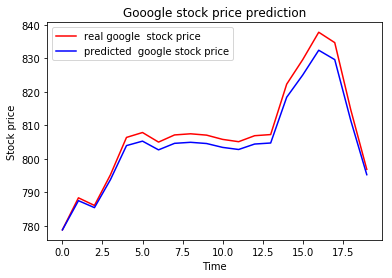

In [38]:
plt.plot(real_stock_price,color="red",label="real google  stock price")
plt.plot(predicted_stock_price,color="blue",label="predicted  google stock price")
plt.title("Gooogle stock price prediction")
plt.xlabel("Time")
plt.ylabel("Stock price")
plt.legend()
plt.show()

In [39]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price,predicted_stock_price))

In [40]:
rmse

2.8955526360594703